Task 1

In [4]:
# task 1-
import numpy as np
def init_q_table(n_states, n_actions):
    return np.zeros((n_states,n_actions))

def q_update(Q, s, a, r, s_next, α, γ):
  max_q_next = np.max(Q[s_next])
  Q[s,a]=Q[s,a]+α*(r+γ*max_q_next - Q[s,a])
  return Q

Task 2

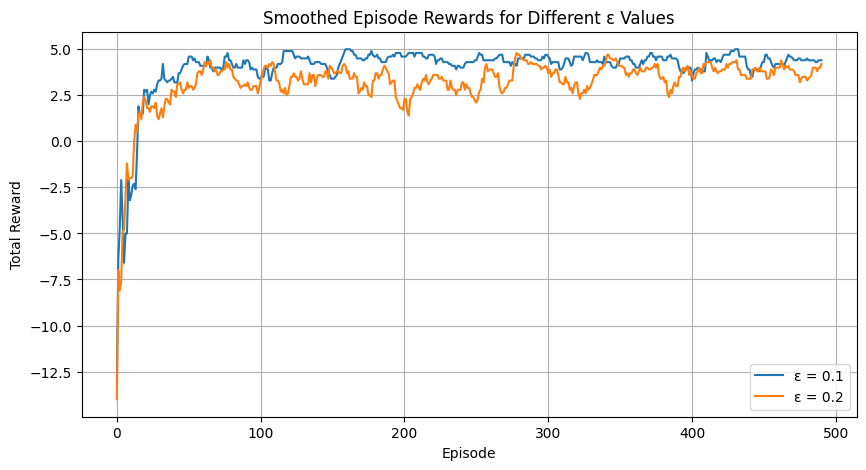

In [5]:
import matplotlib.pyplot as plt
class GridWorld():
 def __init__(self, size=4):
        self.size = size
        self.start = (0, 0)
        self.terminal = (size - 1, size - 1)
        self.reset()

 def reset(self):
        self.agent_pos = self.start
        return self.get_state()
 def get_state(self):
        row, col = self.agent_pos
        return row * self.size + col

 def step(self, action):

        row, col = self.agent_pos

        if action == 0 and row > 0: row -= 1      # going up
        elif action == 1 and row < self.size - 1: row += 1  #going down
        elif action == 2 and col > 0: col -= 1    #going left
        elif action == 3 and col < self.size - 1: col += 1  #going right

        self.agent_pos = (row, col)
        next_state = self.get_state()
        done = self.agent_pos == self.terminal
        reward = 10 if done else -1 # reward is -1 for each step taken and 10 if it reaches the end

        return next_state, reward, done

def select_action(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(4)
    else:
        return np.argmax(Q[state])
env = GridWorld()
Q = np.zeros((16, 4))
epsilon = 0.1
alpha = 0.1
gamma = 0.8
n_episodes = 500

rewards = []
for episode in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = select_action(Q, state, epsilon)
        next_state, reward, done = env.step(action)
        Q = q_update(Q, state, action, reward, next_state, alpha, gamma)
        state = next_state
        total_reward += reward

    rewards.append(total_reward)
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

smoothed_rewards = moving_average(rewards)

# env1 for epsilon = 0.2
env1 = GridWorld()
Q1 = np.zeros((16, 4))
epsilon1 = 0.2
alpha = 0.1
gamma = 0.8
n_episodes = 500

rewards1 = []
for episode in range(n_episodes):
    state = env1.reset()
    total_reward = 0
    done = False

    while not done:
        action = select_action(Q1, state, epsilon1)
        next_state, reward, done = env1.step(action)
        Q1 = q_update(Q1, state, action, reward, next_state, alpha, gamma)
        state = next_state
        total_reward += reward

    rewards1.append(total_reward)

smoothed_rewards1 = moving_average(rewards1)

plt.figure(figsize=(10, 5))
plt.plot(smoothed_rewards, label='ε = 0.1')
plt.plot(smoothed_rewards1, label='ε = 0.2')
plt.title("Smoothed Episode Rewards for Different ε Values")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.legend()
plt.show()

Task 3

In [6]:
import random
class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.position = 0

    def push(self, state, action, reward, next_state, done):
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)

        self.buffer[self.position] = (state, action, reward, next_state, done)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        return (
            np.array(states),
            np.array(actions),
            np.array(rewards, dtype=np.float32),
            np.array(next_states),
            np.array(dones, dtype=np.bool_)
        )

    def __len__(self):
        return len(self.buffer)

In [7]:

buffer = ReplayBuffer(capacity=100)

for _ in range(100):
    state = np.random.randint(0, 16)
    action = np.random.randint(0, 4)
    reward = np.random.uniform(-1, 1)
    next_state = np.random.randint(0, 16)
    done = np.random.choice([True, False])

    buffer.push(state, action, reward, next_state, done)


batch = buffer.sample(batch_size=32)
states, actions, rewards, next_states, dones = batch


print("States:", states.shape, states.dtype)
print("Actions:", actions.shape, actions.dtype)
print("Rewards:", rewards.shape, rewards.dtype)
print("Next States:", next_states.shape, next_states.dtype)
print("Dones:", dones.shape, dones.dtype)

States: (32,) int64
Actions: (32,) int64
Rewards: (32,) float32
Next States: (32,) int64
Dones: (32,) bool


Task 4

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class DQNNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_dim)
    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      return self.fc3(x)

class DQNPolicy(DQNNetwork):
    def __init__(self, input_dim, output_dim):
        super(DQNPolicy, self).__init__(input_dim, output_dim)
class DQNTarget(DQNNetwork):
    def __init__(self, input_dim, output_dim):
        super(DQNTarget, self).__init__(input_dim, output_dim)
def update_target(policy_net, target_net):
    target_net.load_state_dict(policy_net.state_dict())



Task 5

In [ ]:
import gym
import torch.optim as optim
from collections import deque

# reusing the functions defined in prev tasks
class DQNNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.layers(x)

class DQNPolicy(DQNNetwork):
    def __init__(self, input_dim, output_dim):
        super(DQNPolicy, self).__init__(input_dim, output_dim)

class DQNTarget(DQNNetwork):
    def __init__(self, input_dim, output_dim):
        super(DQNTarget, self).__init__(input_dim, output_dim)

def update_target(policy_net, target_net):
    target_net.load_state_dict(policy_net.state_dict())

import random

class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.position = 0

    def push(self, state, action, reward, next_state, done):
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)
        self.buffer[self.position] = (state, action, reward, next_state, done)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
     batch = random.sample(self.buffer, batch_size)
     state, action, reward, next_state, done = map(np.array, zip(*batch))

     done = np.array(done, dtype=bool)

     return (
        torch.tensor(state, dtype=torch.float32),
        torch.tensor(action, dtype=torch.int64),
        torch.tensor(reward, dtype=torch.float32),
        torch.tensor(next_state, dtype=torch.float32),
        torch.tensor(done, dtype=torch.bool)
    )

    def __len__(self):
        return len(self.buffer)


env = gym.make("CartPole-v1")

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

policy_net = DQNPolicy(input_dim, output_dim)
target_net = DQNTarget(input_dim, output_dim)
update_target(policy_net, target_net)

# Optimizer and loss
optimizer = optim.Adam(policy_net.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()

# Initialize Replay Buffer
buffer = ReplayBuffer(capacity=10000)

N = 500  # number of episodes
M = N    # decay over N episodes
X = 5  # target update every X episodes
batch_size = 32
gamma = 0.99
epsilon_start = 1.0
epsilon_end = 0.01

episode_rewards = []
success_threshold = 195
successes = 0

for episode in range(N):
    state = env.reset()
    total_reward = 0
    epsilon = max(epsilon_end, epsilon_start - (epsilon_start - epsilon_end) * episode / M)

    done = False
    while not done:
        # ε-greedy policy
        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            with torch.no_grad():
                state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
                q_values = policy_net(state_tensor)
                action = q_values.argmax().item()


        next_state, reward, terminated, truncated = env.step(action)
        done = terminated or truncated

        buffer.push(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward


        if len(buffer) >= batch_size:
            states, actions, rewards, next_states, dones = buffer.sample(batch_size)

            q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()

            with torch.no_grad():
                next_q_values = target_net(next_states).max(1)[0]
                target_q = rewards + gamma * next_q_values * (~dones)


            loss = loss_fn(q_values, target_q)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    episode_rewards.append(total_reward)

    if total_reward >= success_threshold:
        successes += 1


    if (episode + 1) % X == 0:
        update_target(policy_net, target_net)
def moving_avg(data, window):
    return np.convolve(data, np.ones(window)/window, mode='valid')

window_size = N // 10
plt.figure(figsize=(10,5))
plt.plot(moving_avg(episode_rewards, window_size))
plt.title(f"Moving Average Reward (Window={window_size})")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()

# Final success rate
success_rate = 100 * successes / N
print(f"Final Success Rate: {success_rate:.2f}% of episodes had return >= 195")